## Name: Bhagpreet Brar
## SID: 862013514

In this notebook, I will be looking at the dataset I scraped from phaseI and clean any data that needs to be cleaned, as well as do some EDA on the dataset to find interesting correlations or other things. The dataset is about NBA coach stats from the 1950-2018 seasons, and win loss ratios for the regular season and playoffs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("NBA_Coach_Stats_1950-2018.csv")
df

,Unnamed: 0,Coach,Team,numSznsWTeam,numTotSzns,curr_games,curr_wins,curr_losses,franch_games,franch_wins,...,curr_pl_games,curr_pl_wins,curr_pl_losses,franch_pl_games,franch_pl_wins,franch_pl_losses,tot_pl_games,tot_pl_wins,tot_pl_losses,Season
0,0,Red Auerbach,BOS,13,17,80,58,22,952,620,...,13.0,8.0,5.0,109.0,63.0,46.0,129.0,72.0,57.0,1962
1,1,Jack McMahon,CHZ,1,1,38,12,26,38,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962
2,2,Slick Leonard,CHZ,1,1,42,13,29,42,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962
3,3,Charles Wolf,CIN,3,3,80,42,38,239,118,...,12.0,6.0,6.0,16.0,7.0,9.0,16.0,7.0,9.0,1962
4,4,Dick McGuire,DET,4,4,80,34,46,280,122,...,4.0,1.0,3.0,21.0,8.0,13.0,21.0,8.0,13.0,1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,1685,Cotton Fitzsimmons,SAS,2,15,82,35,47,164,76,...,3.0,0.0,3.0,8.0,2.0,6.0,40.0,13.0,27.0,1985
1686,1686,Bernie Bickerstaff,SEA,1,1,82,31,51,82,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985
1687,1687,Frank Layden,UTA,5,5,82,42,40,390,175,...,4.0,1.0,3.0,25.0,10.0,15.0,25.0,10.0,15.0,1985
1688,1688,Gene Shue,WSB,13,20,69,32,37,1027,522,...,NaN,NaN,NaN,55.0,19.0,36.0,77.0,30.0,47.0,1985


In [2]:
df['pl_win_percent'] = df['curr_pl_wins'] / df['curr_pl_games']
df.describe()

,Unnamed: 0,numSznsWTeam,numTotSzns,curr_games,curr_wins,curr_losses,franch_games,franch_wins,franch_losses,tot_games,...,curr_pl_wins,curr_pl_losses,franch_pl_games,franch_pl_wins,franch_pl_losses,tot_pl_games,tot_pl_wins,tot_pl_losses,Season,pl_win_percent
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,...,846.000000,846.000000,1116.000000,1116.000000,1116.000000,1330.000000,1330.000000,1330.000000,1690.000000,846.000000
mean,844.500000,3.337278,6.738462,69.539645,34.772189,34.767456,247.321893,133.868047,113.453846,502.257396,...,4.640662,4.640662,32.215054,16.998208,15.216846,53.302256,27.545113,25.757143,1991.283432,0.397288
std,488.005294,3.063542,6.018641,21.809605,16.534896,14.254467,244.877204,155.270054,96.872212,477.229297,...,4.328899,1.864892,37.442026,22.928197,15.303844,53.971361,31.863608,23.710991,17.691141,0.208674
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1950.000000,0.000000
25%,422.250000,1.000000,2.000000,66.000000,22.000000,25.000000,82.000000,36.250000,46.000000,150.000000,...,1.000000,3.000000,8.000000,3.000000,5.000000,14.000000,6.000000,8.000000,1979.000000,0.250000
50%,844.500000,2.000000,5.000000,82.000000,37.000000,35.000000,164.000000,79.000000,86.000000,339.000000,...,3.000000,4.000000,19.000000,9.000000,10.000000,35.000000,17.000000,18.000000,1994.000000,0.416667
75%,1266.750000,4.000000,9.000000,82.000000,48.000000,44.000000,328.000000,175.000000,149.000000,698.750000,...,7.000000,6.000000,41.000000,21.000000,20.000000,74.000000,37.000000,36.000000,2006.000000,0.545455
max,1689.000000,23.000000,32.000000,82.000000,73.000000,72.000000,1820.000000,1245.000000,682.000000,2487.000000,...,16.000000,11.000000,284.000000,170.000000,114.000000,333.000000,229.000000,115.000000,2018.000000,0.941176


The average win percentage for a coach in the regular season is 49.5%. The average number of total seasons is 6.7 seasons, and the average number of games in the regular season is 69. The average win percentage in the playoffs is 39.7%, much lower than the regular season win percentages.

In [3]:
teams = df['Team'].unique()
teams
#df[df['Team'] == 'INO'].Season.max()

array(['BOS', 'CHZ', 'CIN', 'DET', 'LAL', 'NYK', 'SFW', 'STL', 'SYR',
       'ATL', 'BAL', 'BUF', 'CHI', 'CLE', 'MIL', 'PHI', 'PHO', 'POR',
       'SDR', 'SEA', 'DAL', 'DEN', 'GSW', 'HOU', 'IND', 'LAC', 'MEM',
       'MIA', 'MIN', 'NJN', 'NOH', 'ORL', 'SAC', 'SAS', 'TOR', 'UTA',
       'WAS', 'CHH', 'WSB', 'VAN', 'BRK', 'CHO', 'NOP', 'OKC', 'CHP',
       'PHW', 'MNL', 'BLB', 'FTW', 'INO', 'MLH', 'ROC', 'CHA', 'KCK',
       'NOJ', 'SDC', 'NOK', 'KCO', 'NYN', 'TRI', 'WSC', 'CAP'],
      dtype=object)

There are 62 unique team names, but currently the NBA only has 30 teams. I will be currently looking online to see the name changes of teams, and try to associate certain team names from the past to their current team name within the NBA.

In [4]:
for i in teams:
    if (i == 'CHZ' or i == 'BAL' or i == 'WSB' or i == 'CHP' or i == 'CAP'):
        df.loc[df['Team'] == i, 'Team'] = 'WAS'; # Washington Wizards
    elif (i == 'CIN' or i == 'ROC' or i == 'KCK' or i == 'KCO'):
        df.loc[df['Team'] == i, 'Team'] = 'SAC'; # Sacramento Kings
    elif (i == 'TRI' or i == 'MLH' or i == 'STL'):
        df.loc[df['Team'] == i, 'Team'] = 'ATL'; # Atlanta Hawks
    elif (i == 'SFW' or i == 'PHW'):
        df.loc[df['Team'] == i, 'Team'] = 'GSW'; # Golden State Warriors
    elif (i == 'MNL'):
        df.loc[df['Team'] == i, 'Team'] = 'LAL'; # Los Angeles Lakers
    elif (i == 'BUF' or i == 'SDC'):
        df.loc[df['Team'] == i, 'Team'] = 'LAC'; # Los Angeles CLippers
    elif (i == 'NYN' or i == 'NJN'):
        df.loc[df['Team'] == i, 'Team'] = 'BRK'; # Brooklyn Nets
    elif (i == 'NOH' or i == 'CHH' or i == 'NOK'):
        df.loc[df['Team'] == i, 'Team'] = 'NOP'; # New Orlean Pelicans
    elif (i == 'CHA'):
        df.loc[df['Team'] == i, 'Team'] = 'CHO'; # Charlotte Hornets
    elif (i == 'SYR'):
        df.loc[df['Team'] == i, 'Team'] = 'PHI'; # Philadelphia 76ers
    elif (i == 'SDR'):
        df.loc[df['Team'] == i, 'Team'] = 'HOU'; # Houston Rockets
    elif (i == 'SEA'):
        df.loc[df['Team'] == i, 'Team'] = 'OKC'; # Oklahoma City Thunder
    elif (i == 'FTW'):
        df.loc[df['Team'] == i, 'Team'] = 'DET'; # Detroit Pistons
    elif (i == 'NOJ'):
        df.loc[df['Team'] == i, 'Team'] = 'UTA'; # Utah Jazz
    elif (i == 'VAN'):
        df.loc[df['Team'] == i, 'Team'] = 'MEM'; # Memphis Grizzlies
        
df = df[df.Team != 'BLB']
df = df[df.Team != 'INO']
df = df[df.Team != 'WSC']

df.Team.unique()

array(['BOS', 'WAS', 'SAC', 'DET', 'LAL', 'NYK', 'GSW', 'ATL', 'PHI',
       'LAC', 'CHI', 'CLE', 'MIL', 'PHO', 'POR', 'HOU', 'OKC', 'DAL',
       'DEN', 'IND', 'MEM', 'MIA', 'MIN', 'BRK', 'NOP', 'ORL', 'SAS',
       'TOR', 'UTA', 'CHO'], dtype=object)

After finding apbr.org/abbreviations.html I could easily figure out the NBA team abbreviations and what team they associated with. Afterwards, I used sportsteamhistory.com to determine the current team name the teams have changed their name to. I checked the data to make sure other stats wouldn't be affected if we change the team names, and luckily the dataset already considered the teams to be the same teams although they were labeled under a different team name. The stats for each coach is still correct, the only correction needed is to change the old team names to the new team names. I ended up dropping one of the team's stats, the Indanapolis Olympians, since they didn't change to a different team name, and only played 3 seasons from 1950-1952. I also dropped the team the Washington Capitals, since they do not correlate to another team as well. I also dropped the Baltimore Bullets, since they are a team of the past that is not needed.

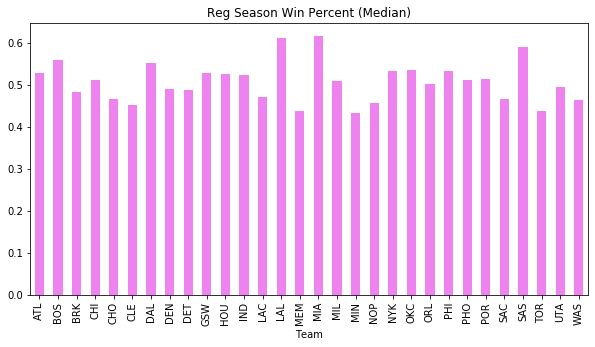

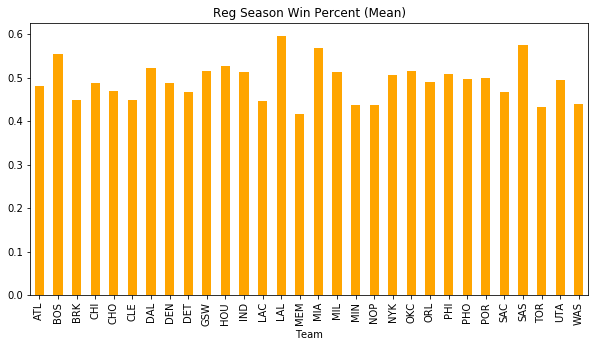

In [5]:
df.groupby('Team').win_percent.median().plot.bar(color = 'violet', figsize = (10,5), title = 'Reg Season Win Percent (Median)')
plt.show()

df.groupby('Team').win_percent.mean().plot.bar(color = 'orange',figsize = (10,5), title = 'Reg Season Win Percent (Mean)')
plt.show()

Looking at the average and median win percentage based off of teams in the regular season, it seems that Lakers, Raptors, Heat, and Celtics have the highest win percentages throughout the 1950-2018 seasons.

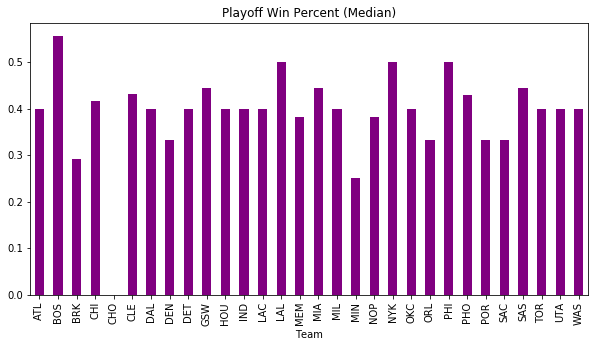

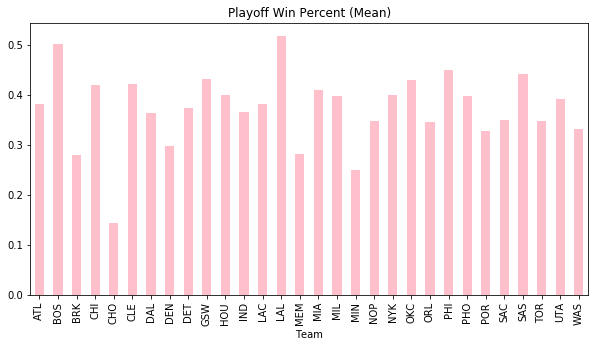

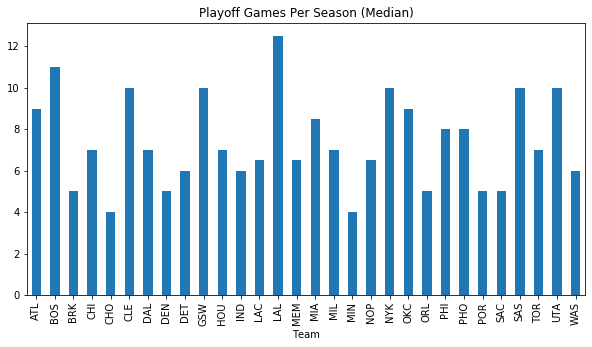

In [6]:
df.groupby('Team').pl_win_percent.median().plot.bar(color = 'purple', figsize = (10,5), title = 'Playoff Win Percent (Median)')
plt.show()

df.groupby('Team').pl_win_percent.mean().plot.bar(color = 'pink', figsize = (10,5), title = 'Playoff Win Percent (Mean)')
plt.show()

df.groupby('Team').curr_pl_games.median().plot.bar(figsize = (10,5), title = 'Playoff Games Per Season (Median)')

A lot of values are missing on the playoff data, and that is because not every team makes it to the playoffs. So I decided to keep these columns and keep values missing to see the playoff performance, and to see how often a team makes it to the playoffs in that season. It seems that the highest win percentages of teams in the playoffs come from the Celtics, Lakers, Knicks, and 76ers. Based on the mean, the highest win percentages come from the Lakers and the Celtics. Looking at the median number of playoff games played in a specific season, the most amount of games played vome from the Lakers and the Celtics. This matches up with the win percentages since you advance and play more playoff games for every game won in the playoffs. Based on these graphs, the lowest performing teams in the playoffs are the Charlotte Hornets, and the Minnesota Timberwolves. They both have the lowest median number of playoff games in a season, and also have the lowest playoff win percentages on average and median per season. 

In [7]:
coaches = df['Coach'].unique()
print('# of Coaches: ' + str(coaches.size) + '\n')

coach_num_szns = df.groupby('Coach').tot_games.count().sort_values(ascending = False)
print(coach_num_szns)

for i in coaches:
    if (coach_num_szns[i] <= 7):
        df = df[df.Coach != i]

print('\nNew # of coaches: ' + str(df['Coach'].unique().size))
df[df['Coach'] == 'Lenny Wilkens'].groupby('Season')

# of Coaches: 293

Coach
Lenny Wilkens       32
Don Nelson          31
Larry Brown         27
George Karl         27
Jerry Sloan         26
                    ..
Dick Van Arsdale     1
John Wetzel          1
Joe Prunty           1
Jeff Bower           1
Tom Barrise          1
Name: tot_games, Length: 293, dtype: int64

New # of coaches: 75


Looking at coaches, there are 293 unique coaches. There are too many to examine, and a lot of the coaches have only coached for a single season. I have decided to remove all coaches that have only coached for 7 seasons or less. After this removal, we are left off with 75 coaches. We want longer term coaches anyways, since more data will be examined when we reach phase 3 in order to produce better prediction models.

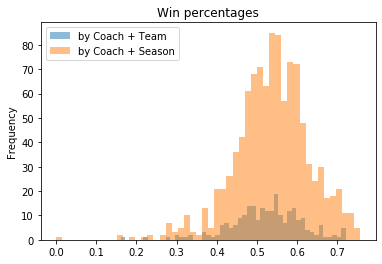

In [8]:
df.groupby(['Coach', 'Team']).win_percent.median().sort_values().plot.hist(title = 'Win percentages', label = 'by Coach + Team', bins = 50, alpha = 0.5, legend = True)
df.groupby(['Coach', 'Season']).win_percent.median().sort_values().plot.hist(label = 'by Coach + Season', bins = 50, alpha = 0.5, legend = True)

We can see that when we group coaches by their teams, the win percentages by the median is negatively skewed. When grouped by their coach and season, the win percentages are still negatively skewed. This may be something to look at later for phase 3 and correcting the skew. It seems that the longer term coaches all have around 50% win percentages, probably because the NBA only hires and keeps the top performing coaches in the league. 

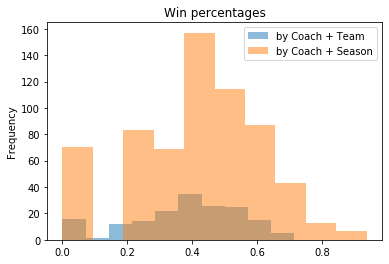

In [9]:
df.groupby(['Coach', 'Team']).pl_win_percent.median().sort_values().plot.hist(title = 'Win percentages', label = 'by Coach + Team', bins = 10, alpha = 0.5, legend = True)
df.groupby(['Coach', 'Season']).pl_win_percent.median().sort_values().plot.hist(label = 'by Coach + Season', bins = 10, alpha = 0.5, legend = True)

Looking at the playoff win percentags, a good amount of teams are not frequently in the playoffs, or they are only in the playoffs for a game or two and fall out of the bracket. Other than that outlier, the data doesn't seem very skewed, although the data isn't exactly symmetric.

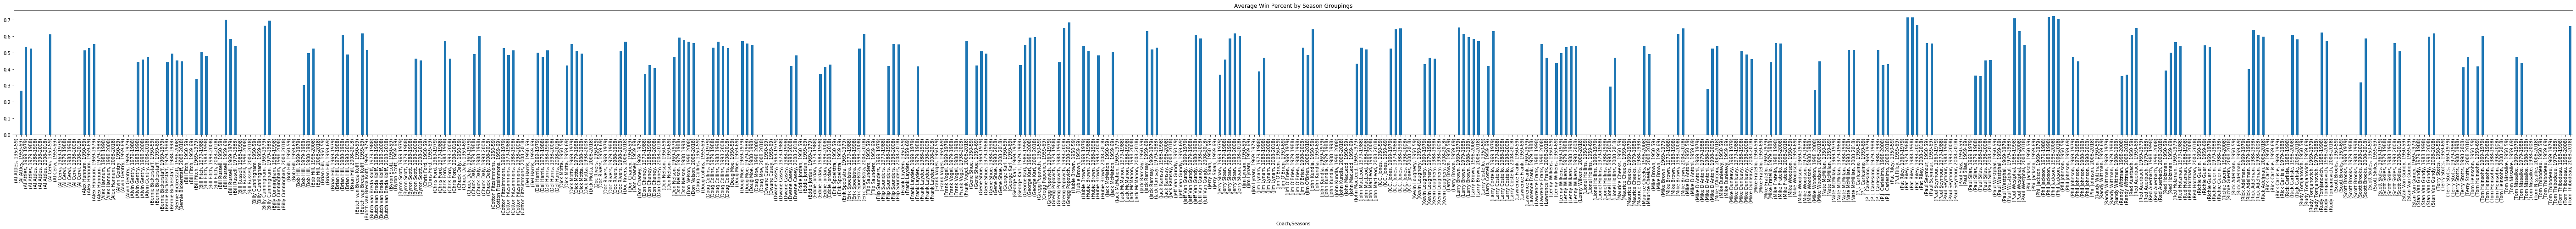

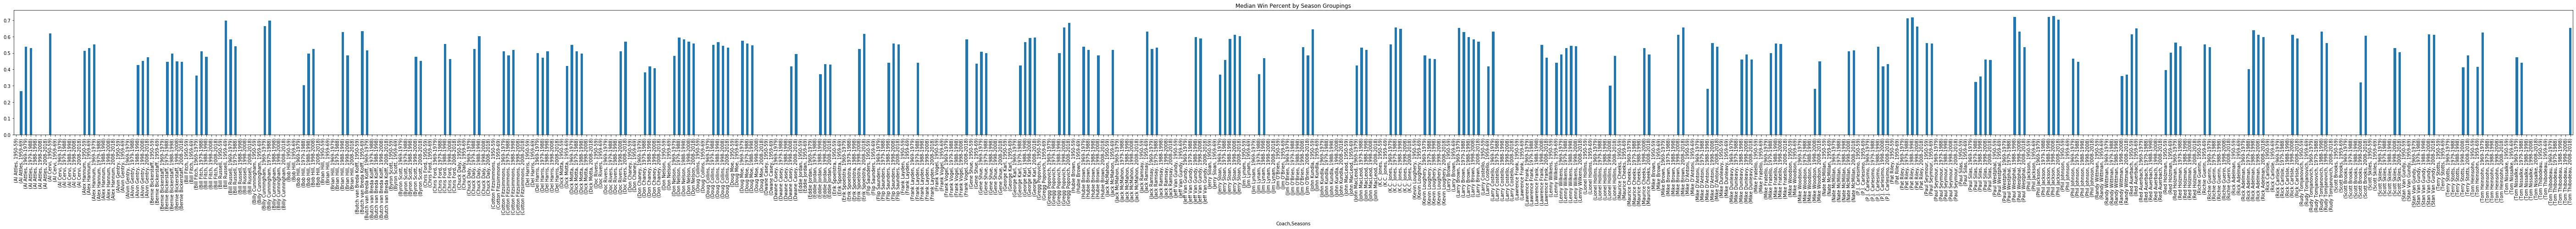

In [10]:
df['Seasons'] = pd.cut(df['Season'], bins = np.linspace(1950, 2018, 8), labels=["1950-59","1959-69","1969-1979","1979-1988","1988-1998","1998-2008","2008-2018"]) 

#print('\nSeasons interval groupings:')
#print(np.linspace(1950, 2018, 8))

print('\n')
df.groupby(['Coach', 'Seasons']).win_percent.mean().plot.bar(title = 'Average Win Percent by Season Groupings', figsize = (100,5))
plt.show()
df.groupby(['Coach', 'Seasons']).win_percent.median().plot.bar(title = 'Median Win Percent by Season Groupings', figsize = (100,5))
plt.show()

Make sure to double click on the plots to zoom in and actually read the stats. Over the seasons 1950-2018, I decided to cut the seasons into 7 evenly spaced bins, to reflect the win percentage of coaches over the number of those seasons. The top performers of the coaching staff throughout their seasons are Phil Jackson, Paul Westphal, Pat Riley, Larry Brown, Gregg Popovich, Bill Russell, and Billy Cunningham.

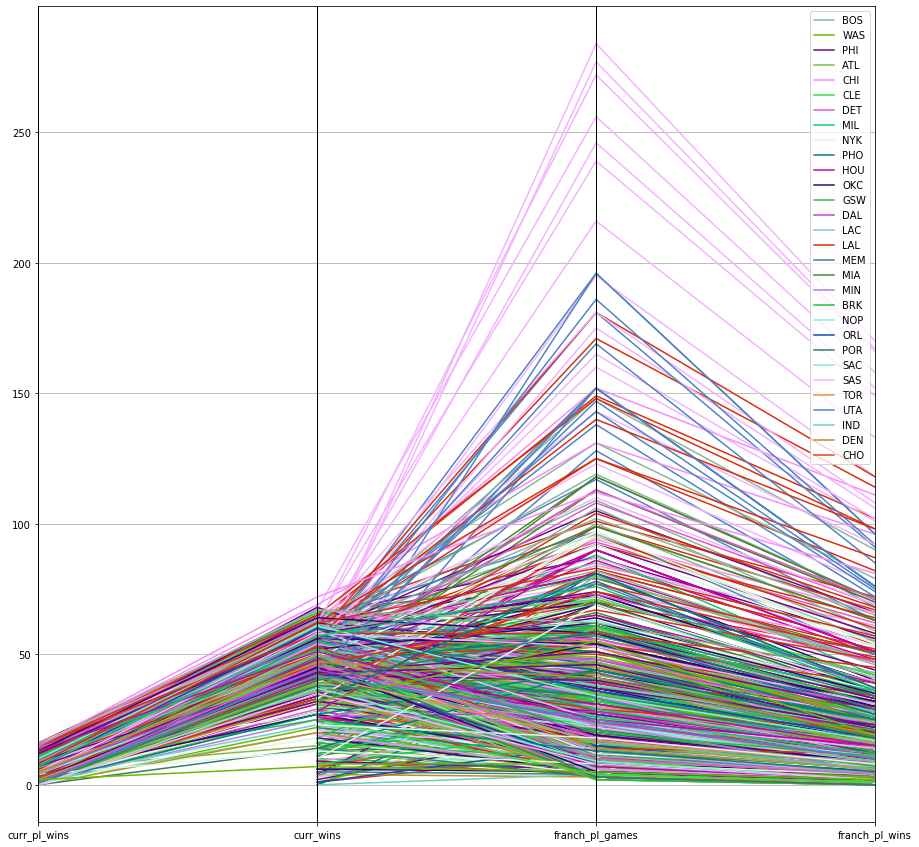

In [11]:
%matplotlib inline
plt.figure(figsize = (15,15))

pd.plotting.parallel_coordinates(
    df[['Team', 'curr_pl_wins', 'curr_wins', 'franch_pl_games', 'franch_pl_wins']], 
    class_column = 'Team')


plt.show()

The most wins by a franchise in the playoffs and regular season seem to be the San Antonio Spurs at the top of the list. Most of the other teams are closer together in these features, so there can not be much said about their relationship other than they seem to have the same frequencies. The Orlando magics seem to be the next highest team to do well in the franchises playoff games, and have a large number of wins.


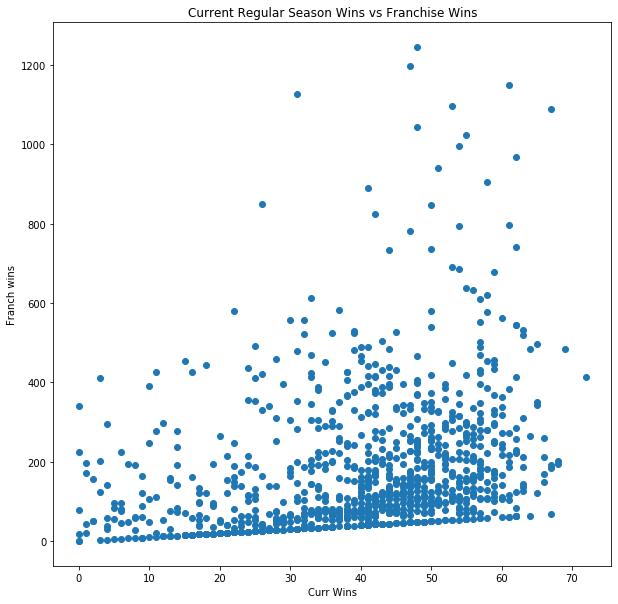

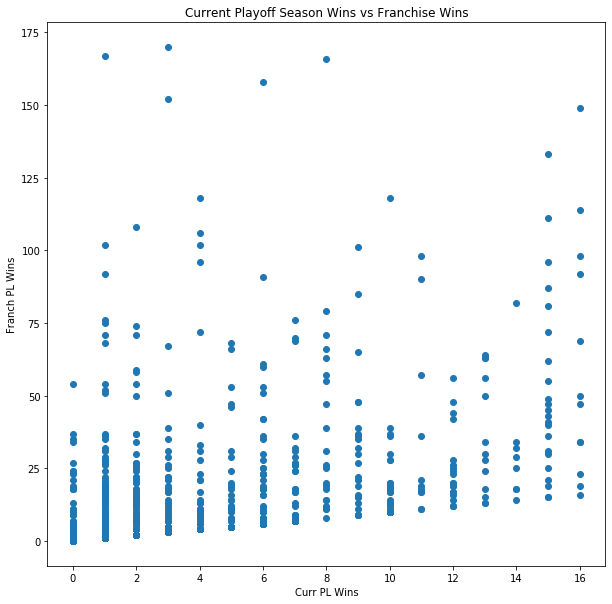

In [12]:
fig=plt.figure(figsize=(10,10))
plt.scatter(df['curr_wins'], df['franch_wins'])
axis = fig.gca() #get current axis
#axis.margins(0.05,-0.25)
axis.set_title('Current Regular Season Wins vs Franchise Wins')
axis.set_xlabel('Curr Wins')
axis.set_ylabel('Franch wins')
fig.canvas.draw()

fig=plt.figure(figsize=(10,10))
plt.scatter(df['curr_pl_wins'], df['franch_pl_wins'])
axis = fig.gca() #get current axis
axis.set_title('Current Playoff Season Wins vs Franchise Wins')
axis.set_xlabel('Curr PL Wins')
#axis.set_xlim(0,800)
axis.set_ylabel('Franch PL Wins')
fig.canvas.draw()

For the regular season, there seems to be somewhat of a relationship between the current season wins compared to the franchise's overall wins. The relationship has a positive correlation, yet the strength of the relationship is weak, since the data is sparse. As for the relationship between the current season playoff wins vs the franchise playoff wins, there seems to be no correlation between the features.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]), <a list of 22 Text xticklabel objects>)

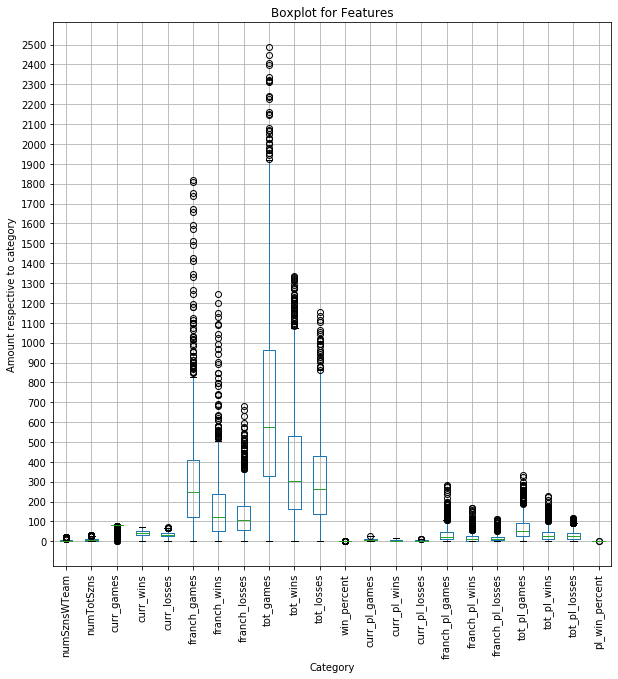

In [13]:
plt.figure(figsize = (10,10))
minusSeason = df.drop(columns = ['Unnamed: 0', 'Season', 'Seasons'])
minusSeason.boxplot()
plt.title("Boxplot for Features")
plt.xlabel("Category")
plt.ylabel("Amount respective to category")
plt.yticks(np.arange(0, 2600, 100)) 
plt.xticks(rotation=90)

There seem to be a number of outliers, which includes features such as franch_games, franch_wins, franch_losses, tot_wins, tot_losses, and other categories. These outliers make sense, since some teams are outperforming others, so outliers will form from losses, wins, and the seperation between the two from different teams throughout the seasons of play. Most of the plots seem positively skewed or skewed right, probably since most of the features have more frequency in the larger numbers of games played/won/etc.